In [1]:

import pandas as pd

fao = pd.read_csv("FAOSTAT_data_en_11-24-2025.csv")   
crop = pd.read_csv("Crop_recommendation.csv")

In [2]:

crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:

fao

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,3.444340e+05,A,Official figure,NaN
1,QCL,Crops and livestock products,356,India,5412,Yield,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,kg/ha,4.840000e+02,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,t,1.666920e+05,A,Official figure,NaN
3,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,5.692710e+05,A,Official figure,NaN
4,QCL,Crops and livestock products,356,India,5412,Yield,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,kg/ha,4.303000e+02,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,QCL,Crops and livestock products,356,India,5412,Yield,0111,Wheat,2022,2022,kg/ha,3.537300e+03,A,Official figure,NaN
6317,QCL,Crops and livestock products,356,India,5510,Production,0111,Wheat,2022,2022,t,1.077421e+08,A,Official figure,NaN
6318,QCL,Crops and livestock products,356,India,5312,Area harvested,0111,Wheat,2023,2023,ha,3.140072e+07,A,Official figure,NaN
6319,QCL,Crops and livestock products,356,India,5412,Yield,0111,Wheat,2023,2023,kg/ha,3.520700e+03,A,Official figure,NaN


In [4]:

fao['Item'].unique()[:40]

array(['Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Apples', 'Apricots', 'Areca nuts', 'Bananas', 'Barley',
       'Beans, dry', 'Beer of barley, malted', 'Cabbages',
       'Cantaloupes and other melons', 'Carrots and turnips',
       'Cashew nuts, in shell', 'Cassava, fresh', 'Castor oil seeds',
       'Cauliflowers and broccoli', 'Cherries', 'Chick peas, dry',
       'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw',
       'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
       'Cocoa beans', 'Coconut oil', 'Coconuts, in shell',
       'Coffee, green', 'Coir, raw', 'Cotton lint, ginned', 'Cotton seed',
       'Cottonseed oil', 'Cucumbers and gherkins',
       'Eggplants (aubergines)', 'Figs', 'Ginger, raw', 'Grapes',
       'Green garlic',
       'Green tea (not fermented), black tea (fermented) and partly fermented tea, in immediate packings of a content not exceeding 3 kg',
       'Groundnut oil', 'Groundnuts, ex

In [5]:

for i in fao['Item'].unique():
    print(i)

Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw
Apples
Apricots
Areca nuts
Bananas
Barley
Beans, dry
Beer of barley, malted
Cabbages
Cantaloupes and other melons
Carrots and turnips
Cashew nuts, in shell
Cassava, fresh
Castor oil seeds
Cauliflowers and broccoli
Cherries
Chick peas, dry
Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw
Chillies and peppers, green (Capsicum spp. and Pimenta spp.)
Cocoa beans
Coconut oil
Coconuts, in shell
Coffee, green
Coir, raw
Cotton lint, ginned
Cotton seed
Cottonseed oil
Cucumbers and gherkins
Eggplants (aubergines)
Figs
Ginger, raw
Grapes
Green garlic
Green tea (not fermented), black tea (fermented) and partly fermented tea, in immediate packings of a content not exceeding 3 kg
Groundnut oil
Groundnuts, excluding shelled
Jute, raw or retted
Kenaf, and other textile bast fibres, raw or retted
Lemons and limes
Lentils, dry
Lettuce and chicory
Linseed
Maize (corn)
Mangoes, guavas and mangosteens
Margarine and shorte

In [6]:

crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
fao['Item'] = fao['Item'].str.split(r",|and")
fao = fao.explode('Item') 

In [8]:

fao

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,Anise,2000,2000,ha,3.444340e+05,A,Official figure,NaN
0,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,badian,2000,2000,ha,3.444340e+05,A,Official figure,NaN
0,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,cori,2000,2000,ha,3.444340e+05,A,Official figure,NaN
0,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,er,2000,2000,ha,3.444340e+05,A,Official figure,NaN
0,QCL,Crops and livestock products,356,India,5312,Area harvested,01654,cumin,2000,2000,ha,3.444340e+05,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,QCL,Crops and livestock products,356,India,5412,Yield,0111,Wheat,2022,2022,kg/ha,3.537300e+03,A,Official figure,NaN
6317,QCL,Crops and livestock products,356,India,5510,Production,0111,Wheat,2022,2022,t,1.077421e+08,A,Official figure,NaN
6318,QCL,Crops and livestock products,356,India,5312,Area harvested,0111,Wheat,2023,2023,ha,3.140072e+07,A,Official figure,NaN
6319,QCL,Crops and livestock products,356,India,5412,Yield,0111,Wheat,2023,2023,kg/ha,3.520700e+03,A,Official figure,NaN


In [9]:

crop_mapping = {
    "Rice": "rice",
    "Maize (corn)": "maize",
    "Chick peas":"chickpea",
    "Pigeon peas":"pigeonpeas" ,
    "Beans":"mothbeans" ,
    "Lentils":"lentil" ,
    "Bananas":"banana" ,
    "Mangoes": "mango" ,
    "Grapes":"grapes" ,
    "Watermelons":"watermelon" ,
    "Cantaloupes ":"muskmelon",   
    "Apples":"apple" ,
    "Oranges":"orange" ,
    "Papayas":"papaya" ,
    "Coconuts":"coconut" ,
    "Seed cotton":"cotton"  ,
    "Jute":"jute" ,
    "Coffee":"coffee"
    
}

In [10]:

len(crop_mapping)

18

In [11]:

fao['Crop']=fao['Item'].map(crop_mapping)

In [12]:

crop=crop.rename(columns={'label':'Crop'})

In [13]:

crop

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [14]:

df_merged = crop.merge(
    fao,
    left_on="Crop",
    right_on="Crop",
    how="inner"
)

In [15]:

df_merged

,N,P,K,temperature,humidity,ph,rainfall,Crop,Domain Code,Domain,...,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Area harvested,0113,Rice,2000,2000,ha,4.471200e+07,A,Official figure,NaN
1,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Yield,0113,Rice,2000,2000,kg/ha,2.850800e+03,A,Official figure,NaN
2,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Production,0113,Rice,2000,2000,t,1.274649e+08,A,Official figure,NaN
3,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Area harvested,0113,Rice,2001,2001,ha,4.490000e+07,A,Official figure,NaN
4,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Yield,0113,Rice,2001,2001,kg/ha,3.115800e+03,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129595,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,QCL,Crops and livestock products,...,Yield,01610,Coffee,2022,2022,kg/ha,7.742000e+02,E,Estimated value,NaN
129596,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,QCL,Crops and livestock products,...,Production,01610,Coffee,2022,2022,t,3.404065e+05,I,Value imputed by a receiving agency,NaN
129597,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,QCL,Crops and livestock products,...,Area harvested,01610,Coffee,2023,2023,ha,4.378620e+05,I,Value imputed by a receiving agency,NaN
129598,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,QCL,Crops and livestock products,...,Yield,01610,Coffee,2023,2023,kg/ha,7.602000e+02,E,Estimated value,NaN


In [16]:

df_merged = df_merged[df_merged['Element'] == 'Production']

In [17]:

df_merged

,N,P,K,temperature,humidity,ph,rainfall,Crop,Domain Code,Domain,...,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
2,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Production,0113,Rice,2000,2000,t,1.274649e+08,A,Official figure,NaN
5,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Production,0113,Rice,2001,2001,t,1.399000e+08,A,Official figure,NaN
8,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Production,0113,Rice,2002,2002,t,1.077303e+08,A,Official figure,NaN
11,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Production,0113,Rice,2003,2003,t,1.327890e+08,A,Official figure,NaN
14,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,QCL,Crops and livestock products,...,Production,0113,Rice,2004,2004,t,1.246971e+08,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129587,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,QCL,Crops and livestock products,...,Production,01610,Coffee,2019,2019,t,3.195000e+05,A,Official figure,NaN
129590,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,QCL,Crops and livestock products,...,Production,01610,Coffee,2020,2020,t,2.980000e+05,A,Official figure,NaN
129593,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,QCL,Crops and livestock products,...,Production,01610,Coffee,2021,2021,t,3.340000e+05,A,Official figure,NaN
129596,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,QCL,Crops and livestock products,...,Production,01610,Coffee,2022,2022,t,3.404065e+05,I,Value imputed by a receiving agency,NaN


In [18]:

df_merged['Crop'].value_counts()

Crop
rice          2400
maize         2400
jute          2400
cotton        2400
coconut       2400
papaya        2400
orange        2400
apple         2400
muskmelon     2400
watermelon    2400
grapes        2400
mango         2400
banana        2400
lentil        2400
mothbeans     2400
pigeonpeas    2400
chickpea      2400
coffee        2400
Name: count, dtype: int64

In [19]:

df_merged=df_merged.drop(columns=['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item','Year', 'Year Code','Unit', 'Flag', 'Flag Description', 'Note'])

In [20]:

df_merged

,N,P,K,temperature,humidity,ph,rainfall,Crop,Value
2,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.274649e+08
5,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.399000e+08
8,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.077303e+08
11,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.327890e+08
14,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.246971e+08
...,...,...,...,...,...,...,...,...,...
129587,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,3.195000e+05
129590,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,2.980000e+05
129593,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,3.340000e+05
129596,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,3.404065e+05


In [21]:

df_merged.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
Value          0
dtype: int64

In [22]:

df_merged.duplicated().sum()  

600

In [23]:

df_merged=df_merged.drop_duplicates().reset_index(drop=True)

In [24]:

df_merged

,N,P,K,temperature,humidity,ph,rainfall,Crop,Value
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.274649e+08
1,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.399000e+08
2,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.077303e+08
3,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.327890e+08
4,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.246971e+08
...,...,...,...,...,...,...,...,...,...
42595,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,3.195000e+05
42596,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,2.980000e+05
42597,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,3.340000e+05
42598,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,3.404065e+05


In [25]:

df_merged.describe()

,N,P,K,temperature,humidity,ph,rainfall,Value
count,42600.000000,42600.000000,42600.000000,42600.000000,42600.000000,42600.000000,42600.000000,4.260000e+04
mean,56.193005,54.474202,53.774648,25.750324,72.660051,6.456724,108.253987,1.564312e+07
std,37.953587,35.032819,54.690075,5.108830,20.817026,0.807079,58.380659,3.578103e+07
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,2.550000e+05
25%,24.000000,28.000000,22.000000,23.089749,60.277664,5.996932,66.293904,1.709460e+06
50%,44.000000,50.000000,35.000000,25.624466,80.499799,6.395258,96.515240,3.627500e+06
75%,91.000000,69.000000,52.000000,28.436471,90.452617,6.890760,145.417239,1.316020e+07
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,2.067270e+08


In [26]:

df_merged.nunique()

N               136
P               117
K                73
temperature    1800
humidity       1800
ph             1800
rainfall       1800
Crop             18
Value           426
dtype: int64

In [27]:

import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols=["N","P","K","temperature","humidity","ph","rainfall","Value"]

In [28]:
Q1=df_merged[numeric_cols].quantile(0.25)
Q3=df_merged[numeric_cols].quantile(0.75)
IQR=Q3-Q1

final_clean=df_merged[~((df_merged[numeric_cols]<(Q1-1.5*IQR))|
                        (df_merged[numeric_cols]>(Q3+1.5*IQR))).any(axis=1)]
print("Before:",df_merged.shape)
print("After:",final_clean.shape)
print("Removed Rows:",df_merged.shape[0]-final_clean.shape[0])

Before: (42600, 9)
After: (30881, 9)
Removed Rows: 11719


In [29]:

final_clean.head()

,N,P,K,temperature,humidity,ph,rainfall,Crop,Value
2400,71,54,16,22.6136,63.690706,5.749914,87.759539,maize,12043200.0
2401,71,54,16,22.6136,63.690706,5.749914,87.759539,maize,13160200.0
2402,71,54,16,22.6136,63.690706,5.749914,87.759539,maize,11151700.0
2403,71,54,16,22.6136,63.690706,5.749914,87.759539,maize,14984300.0
2404,71,54,16,22.6136,63.690706,5.749914,87.759539,maize,14172000.0


In [30]:

len(final_clean)

30881

In [31]:

final_clean['Crop'].value_counts()

Crop
lentil        2400
watermelon    2400
coconut       2400
cotton        2400
jute          2400
muskmelon     2300
coffee        2300
mango         2280
pigeonpeas    2208
maize         2000
orange        1701
banana        1700
chickpea      1632
papaya        1488
mothbeans     1272
Name: count, dtype: int64

In [32]:

all_crops = set(df_merged['Crop'].unique())
clean_crops = set(final_clean['Crop'].unique())

print("Crops Before Cleaning:", len(all_crops), sorted(all_crops))
print("Crops After Cleaning:", len(clean_crops), sorted(clean_crops))

print("\n Removed Crops:")
print(sorted(all_crops - clean_crops))

Crops Before Cleaning: 18 ['apple', 'banana', 'chickpea', 'coconut', 'coffee', 'cotton', 'grapes', 'jute', 'lentil', 'maize', 'mango', 'mothbeans', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'rice', 'watermelon']
Crops After Cleaning: 15 ['banana', 'chickpea', 'coconut', 'coffee', 'cotton', 'jute', 'lentil', 'maize', 'mango', 'mothbeans', 'muskmelon', 'orange', 'papaya', 'pigeonpeas', 'watermelon']

 Removed Crops:
['apple', 'grapes', 'rice']


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [34]:
X = df_merged.drop('Crop', axis=1)
y = df_merged['Crop']



In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=300, random_state=42)

In [38]:
y_pred = model.predict(X_test_scaled)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00       480
      banana       1.00      1.00      1.00       480
    chickpea       1.00      1.00      1.00       480
     coconut       1.00      1.00      1.00       480
      coffee       1.00      1.00      1.00       460
      cotton       1.00      1.00      1.00       480
      grapes       1.00      1.00      1.00       480
        jute       1.00      1.00      1.00       480
      lentil       1.00      1.00      1.00       480
       maize       1.00      1.00      1.00       460
       mango       1.00      1.00      1.00       480
   mothbeans       1.00      1.00      1.00       480
   muskmelon       1.00      1.00      1.00       460
      orange       1.00      1.00      1.00       420
      papaya       1.00      1.00      1.00       480
  pigeonpeas       1.00      1.00      1.00       480
        rice       1.00      1.00      1.0

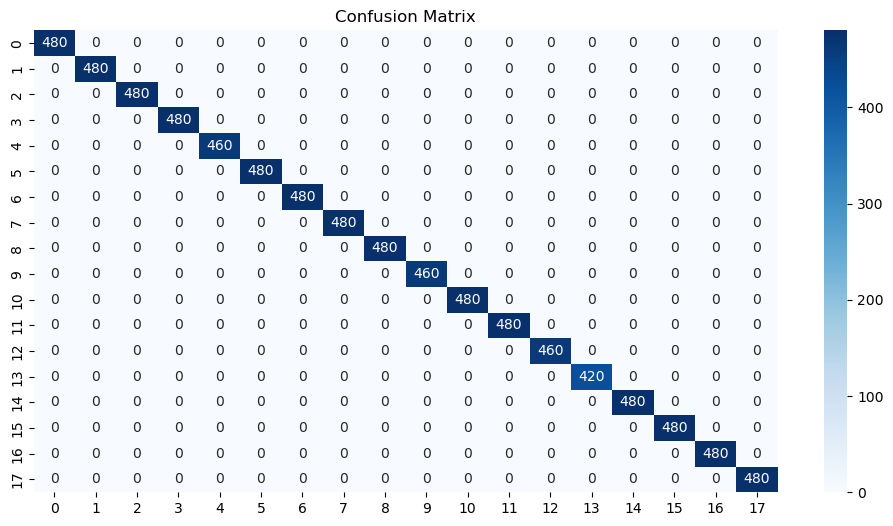

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.show()


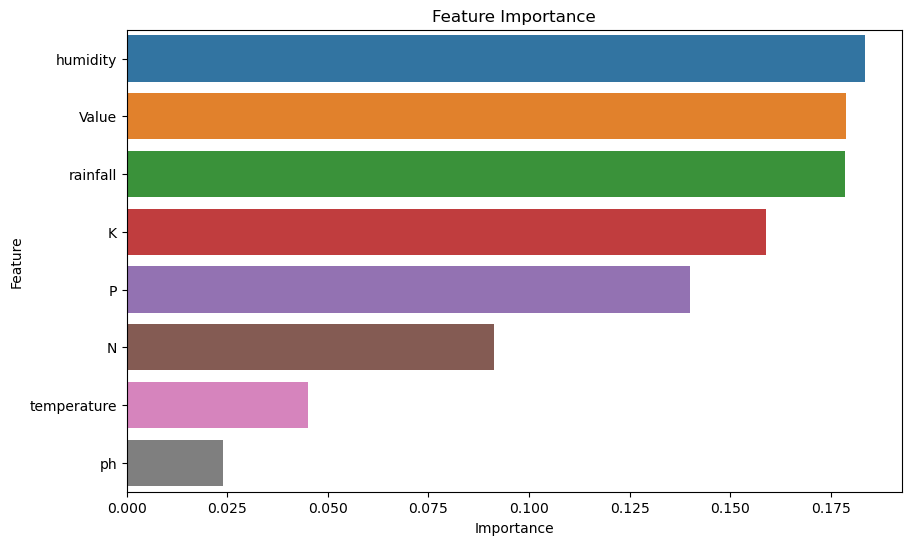

In [40]:
importances = model.feature_importances_
feature_names = X.columns

fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=fi_df, y='Feature', x='Importance')
plt.title("Feature Importance")
plt.show()


In [41]:
X = df_merged.drop(['Crop', 'Value'], axis=1)
y = df_merged['Crop']


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=300, random_state=42)

In [45]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test_scaled)

print("Train Accuracy:", accuracy_score(y_train, model.predict(X_train_scaled)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Train Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00       480
      banana       1.00      1.00      1.00       480
    chickpea       1.00      1.00      1.00       480
     coconut       1.00      1.00      1.00       480
      coffee       1.00      1.00      1.00       460
      cotton       1.00      1.00      1.00       480
      grapes       1.00      1.00      1.00       480
        jute       1.00      1.00      1.00       480
      lentil       1.00      1.00      1.00       480
       maize       1.00      1.00      1.00       460
       mango       1.00      1.00      1.00       480
   mothbeans       1.00      1.00      1.00       480
   muskmelon       1.00      1.00      1.00       460
      orange       1.00      1.00      1.00       420
      papaya       1.00      1.00      1.00       480
  pigeonpeas       1.00      1.00      1.00       480
        rice       1.00      1.00      1.0

In [46]:
df_merged.duplicated().sum()


0

In [47]:
df_merged.drop('Crop', axis=1).duplicated().sum()


0

In [48]:
df_merged.drop('Crop', axis=1).nunique()


N               136
P               117
K                73
temperature    1800
humidity       1800
ph             1800
rainfall       1800
Value           426
dtype: int64

In [49]:
# Convert to DataFrame for easy comparison
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Check overlap
overlap = pd.merge(X_train_df, X_test_df, how='inner')
print("Overlapping rows between train and test:", overlap.shape[0])


Overlapping rows between train and test: 154828


In [51]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [52]:
df_unique = df_merged.drop_duplicates(subset=features + ['Crop'])


In [53]:
# Select features and target
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = df_unique[features]
y = df_unique['Crop']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model (limit depth to prevent memorization)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("Train Accuracy:", accuracy_score(y_train, model.predict(X_train_scaled)))
print("Test Accuracy:", accuracy_score(y_test, model.predict(X_test_scaled)))
print(classification_report(y_test, model.predict(X_test_scaled)))


Train Accuracy: 1.0
Test Accuracy: 0.9944444444444445
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00      1.00      1.00        20
  pigeonpeas       1.00      1.00      1.00        20
        rice       1.00    

In [55]:
from sklearn.metrics import accuracy_score

# Predictions on training data
y_train_pred = model.predict(X_train_scaled)

# Predictions on test data
y_test_pred = model.predict(X_test_scaled)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 1.0
Test Accuracy: 0.9944444444444445


In [56]:
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 1.0000
Test Accuracy: 0.9944


In [57]:
#Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [8, 10, 12, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

print("Best Parameters:", random_search.best_params_)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15}


In [58]:
#Train Improved Model with Best Parameters

best_model = random_search.best_estimator_

# Training & test accuracy
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, best_model.predict(X_train_scaled))
test_acc = accuracy_score(y_test, best_model.predict(X_test_scaled))

print("Improved Train Accuracy:", train_acc)
print("Improved Test Accuracy:", test_acc)


Improved Train Accuracy: 0.9979166666666667
Improved Test Accuracy: 0.9916666666666667


In [59]:
#Cross-Validation

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    best_model,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='accuracy'
)

print("Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Accuracy: 0.9958333333333333


In [60]:
#Feature Selection

import pandas as pd

importances = best_model.feature_importances_
feature_names = X.columns

fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(fi_df)


       Feature  Importance
6     rainfall    0.234869
4     humidity    0.202954
2            K    0.183492
1            P    0.156905
0            N    0.113322
3  temperature    0.060920
5           ph    0.047539


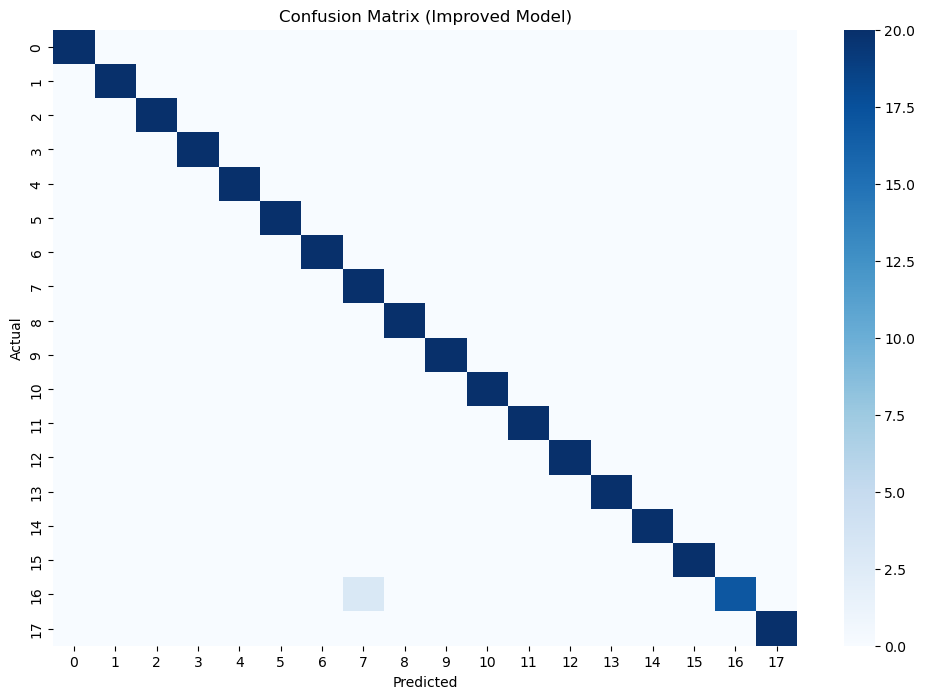

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, best_model.predict(X_test_scaled))

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title("Confusion Matrix (Improved Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
